# Chatbot tests

## Accept / Deny  and Greet / Goodbye

To test those intents I triggered `rasa shel --debug` and tried as many possibilities as I thought to accept / deny / greet and say goodbye to the chatbot. 
Some examples were the following: 
- Hey you
- Hi
- Absolutely not
- I would love to
- I'd rather not
- Bye
- Sure
- Good morning
- Morning!

## Actions: Location & Days

In [1]:
import spacy

## Main code of Location Action
def validate_location_slot(text):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the text
    doc = nlp(text)

    # Extract entities that are classified as 'GPE' (Geopolitical entity, i.e., countries, cities, states)
    city_names = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    if city_names:
        print('You requested the weather in ' + str(city_names[0]))
        print(city_names[0])
        return str(city_names[0])
    else:
        print('Could not determine the city sorry!')
        return None

In [2]:
text1 = "I want to know Amsterdam."
text2 = "I live in Ciudad de Mexico."
text3 = "I want to know the weather in Berlin"

for text in [text1, text2, text3]:
    cities = validate_location_slot(text)
    print(f"Cities in '{text}': {cities}")

You requested the weather in Amsterdam
Amsterdam
Cities in 'I want to know Amsterdam.': Amsterdam
You requested the weather in Ciudad de Mexico
Ciudad de Mexico
Cities in 'I live in Ciudad de Mexico.': Ciudad de Mexico
You requested the weather in Berlin
Berlin
Cities in 'I want to know the weather in Berlin': Berlin


In [3]:
from word2number import w2n
import dateparser
from datetime import datetime

# Main code for Days Action
def validate_days_slot(text):
    try:
        # Attempt to convert words to numbers
        days = w2n.word_to_num(text)
        message = f"You requested {days} days"
    except ValueError:
        target_date = dateparser.parse(text)
        if target_date:
            current_date = datetime.now()
            delta = target_date - current_date
            days = delta.days + 2
            message = f"You requested {days} days"
        else:
            message = "Unable to parse your days into an integer"
            days = None
    print(message)
    return {"days_slot": days}

In [4]:
text1 = "Today"
text2 = "Next week"
text3 = "Six days"

for text in [text1, text2, text3]:
    cities = validate_days_slot(text)
    print(f"Days in '{text}': {cities}")

You requested 1 days
Days in 'Today': {'days_slot': 1}
You requested 8 days
Days in 'Next week': {'days_slot': 8}
You requested 6 days
Days in 'Six days': {'days_slot': 6}


## Backend tests

### Controller tests

For the controller, the goal was that the model action returned a dictionary such as: 


In [5]:
example_user_resp = {
    "location": "london",
    "days": 4,
    "temperature": True,
    "sunny": True,
    "precipitation": True,
    "wind": True,
    "humidity": False,
    "sunrise_sunset": True
}

### Weather Information tests

Once the controller receives the output, the weather information is triggered, and the following code was executed to test it. 

In [6]:
from weather_information import WeatherInformation

In [7]:
## Weather info
example_user_resp = {
    "location": "london",
    "days": 4,
    "temperature": True,
    "sunny": True,
    "precipitation": True,
    "wind": True,
    "humidity": True,
    "sunrise_sunset": True
}
wi = WeatherInformation(example_user_resp)
weather_info = wi.get_weather_info()

print(weather_info)

{'location': 'london', 'days': 4, 'temperature': [8, 2, 22, 0], 'sunny': [1, 9, 4, 4], 'precipitation': [9.526745371790561, 5.459561219948447, 0.3291845084594036, 0.6000941224523026], 'wind': [15.006136510430817, 13.652649913523405, 1.9093300784510414, 12.534221629448698], 'humidity': [16, 27, 57, 41], 'sunrise_sunset': [('06:24AM', '08:09PM'), ('08:30AM', '08:08PM'), ('07:56AM', '07:56PM'), ('07:08AM', '08:47PM')], 'days_list': ['02/08/24', '02/09/24', '02/10/24', '02/11/24']}


### Visualization Dashboard Tests

Once the weather information is returned, I performed tests in the Visualization plots. 

In [8]:
from viz_dash import VisualizationDashboard
import matplotlib.pyplot as plt

/Users/normagutierrez/Desktop/EDUCATION/IU/Project AI Use Case/chatbot_code/WeatherChatbot/viz_dash.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=self.df.index, y=self.df['Temperature'], palette="Blues_d", ax=ax, ci=None, marker='o')
/Users/normagutierrez/Desktop/EDUCATION/IU/Project AI Use Case/chatbot_code/WeatherChatbot/viz_dash.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=self.df.index, y=self.df['Temperature'], palette="Blues_d", ax=ax, ci=None, marker='o')
/Users/normagutierrez/Desktop/EDUCATION/IU/Project AI Use Case/chatbot_code/WeatherChatbot/viz_dash.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self.df.index, y=self.df['Sunny'], palette="YlOrBr", ax=ax)
/Users/normagutierrez/Desktop/EDUCATION/

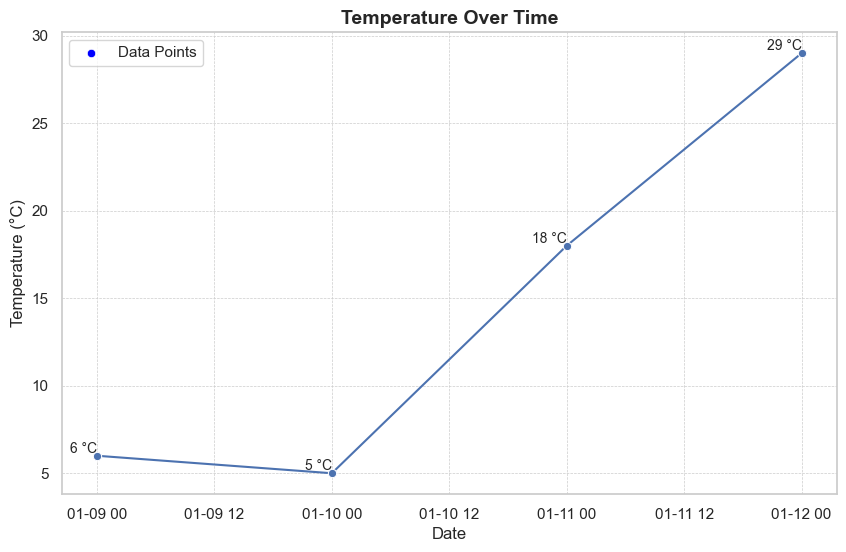

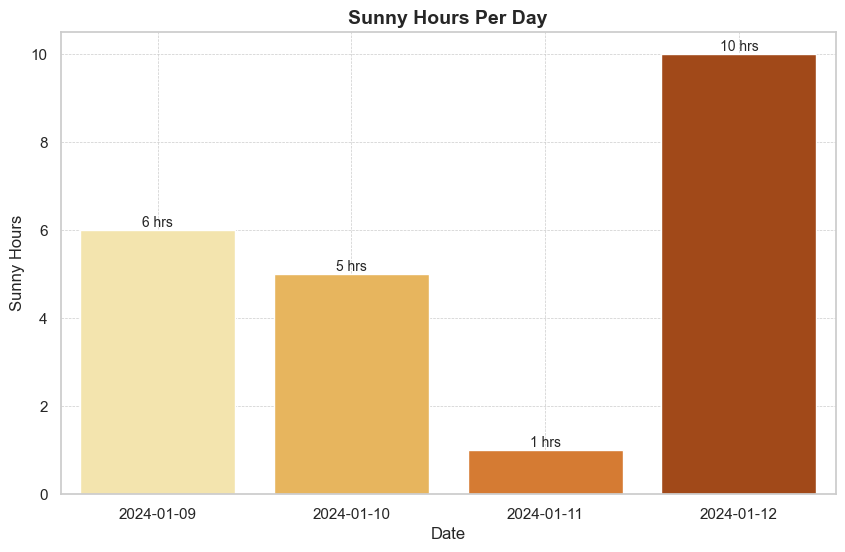

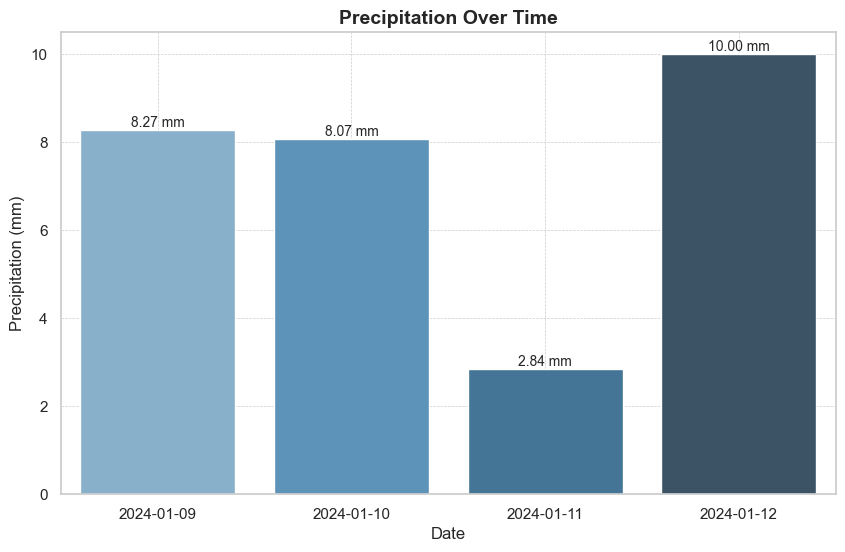

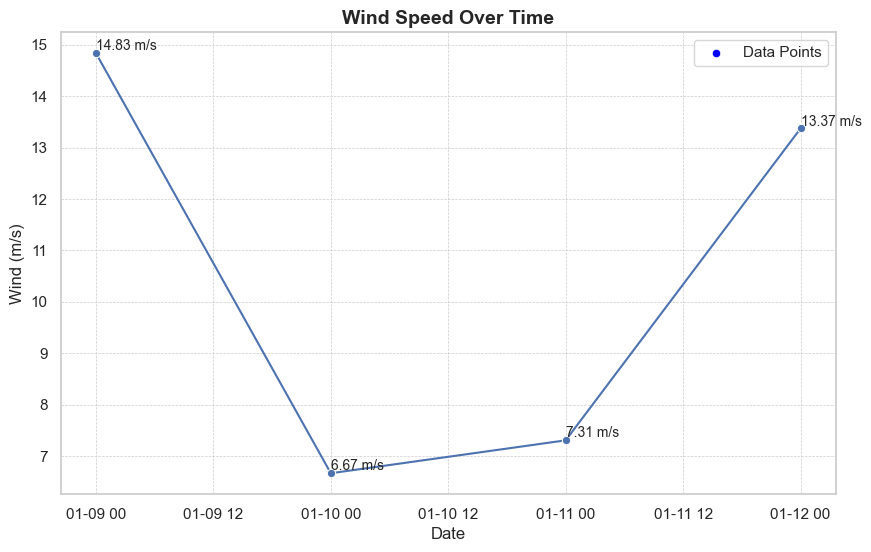

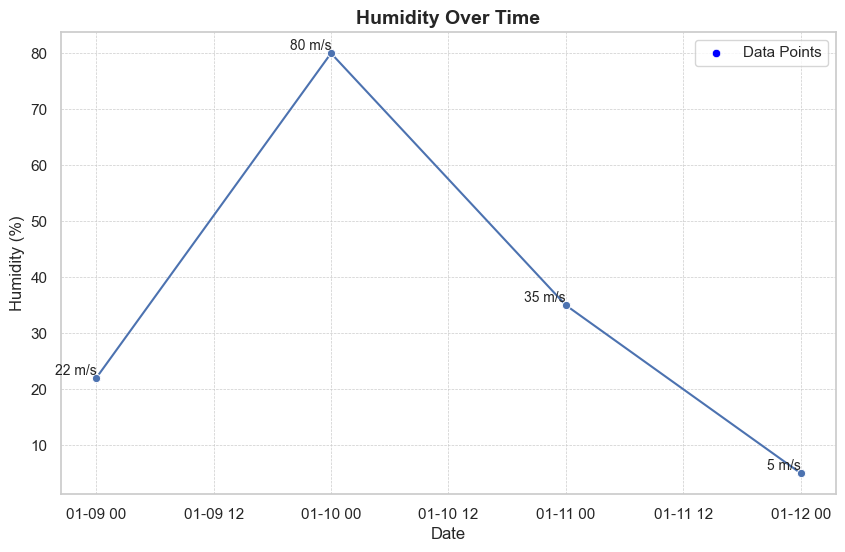

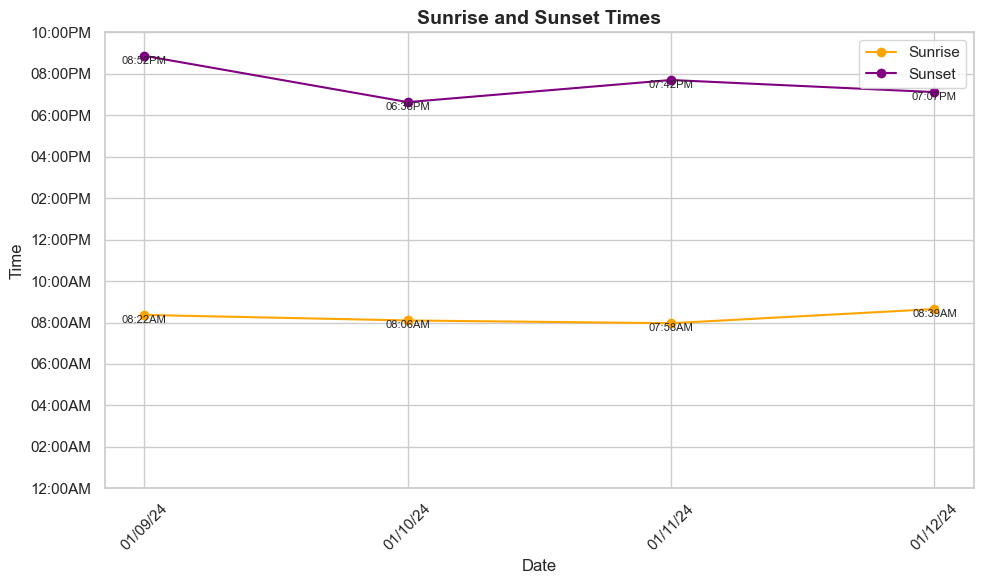

In [9]:
sample_data = {
    'location': 'london', 
    'days': 4, 
    'temperature': [6, 5, 18, 29], 
    'sunny': [6, 5, 1, 10],
    'precipitation': [8.271610857140708, 8.071943576349032, 2.844214245838066, 9.99895267526315],
    'wind': [14.834515085743334, 6.6653584874527505, 7.305588651356283, 13.370943297023864], 
    'humidity': [22, 80, 35, 5], 
    'sunrise_sunset': [('08:22AM', '08:52PM'), ('08:06AM', '06:38PM'), ('07:58AM', '07:42PM'), ('08:39AM', '07:07PM')], 
    'days_list': ['01/09/24', '01/10/24', '01/11/24', '01/12/24']
}
vd = VisualizationDashboard(sample_data)
plots = vd.run()

# print(plots)
# plots = dict()
# plots["sunny"] = vd.get_sunny_plot()

for plot_name in list(plots.keys()):
    plt.show()